# **Basics of scikit-learn package** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme(style='whitegrid')

## Supervised learning (контролируемое обучение / обучение с учителем)

### 1.1 *Linear Models (Линейные модели)*

Линейные модели являются основой многих методов машинного обучения. Они просты в интерпретации, быстры в обучении и хорошо работают на больших данных. Основная идея линейных моделей заключается в том, что целевая переменная $y$ выражается как линейная комбинация входных признаков $X$:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n + \varepsilon
$$

где:
- $w_0$ — свободный коэффициент (intercept),
- $w_1, \dots, w_n$ — веса модели (коэффициенты),
- $x_1, \dots, x_n$ — входные признаки,
- $\varepsilon$ — ошибка модели (остаточный член).

### 1.1.1 Метод наименьших квадратов (Ordinary Least Squares, OLS)

Метод наименьших квадратов минимизирует сумму квадратов ошибок между предсказанными значениями $\hat{y}$ и реальными значениями $y$:

$$
J(w) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{m} (y_i - (w_0 + \sum_{j=1}^{n} w_j x_{ij}))^2
$$

Оптимальные коэффициенты $w$ находятся по формуле:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

В scikit-learn линейная регрессия реализуется с помощью `LinearRegression`:

In [2]:
from sklearn.linear_model import LinearRegression

X = [[1, 2], [2, 3], [3, 4], [4, 5]]  # Признаки
y = [3, 5, 7, 9]  # Целевая переменная

model = LinearRegression()
model.fit(X, y)

print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)

Коэффициенты: [1. 1.]
Свободный член: 1.7763568394002505e-15


Оценки коэффициентов для метода наименьших квадратов основаны на независимости признаков. Когда признаки коррелируют и столбцы матрицы признаков $X$
имеют приблизительно линейную зависимость, матрица  становится близкой к сингулярной, и в результате оценка наименьших квадратов становится очень чувствительной к случайным ошибкам в наблюдаемой цели, производя большую дисперсию. Такая ситуация мультиколлинеарности может возникнуть, например, когда данные собираются без экспериментального дизайна.

Можно ограничить все коэффициенты неотрицательными значениями, что может быть полезно, когда они представляют некоторые физические или естественно неотрицательные величины (например, частотные показатели или цены товаров). `LinearRegression` принимает булевый параметр `positive` : если установлено значение `True` , то применяются наименьшие квадраты.

### 1.1.2 Линейная регрессия с L2-регуляризацией (Ridge Regression)

Ridge-регрессия добавляет L2-регуляризацию (штраф за большие коэффициенты) для предотвращения переобучения:

$$
J(w) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} w_j^2
$$

где $\lambda$ — параметр регуляризации. Чем больше $\lambda$, тем сильнее штраф за большие коэффициенты.

Пример реализации Ridge-регрессии в scikit-learn:

In [3]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

print("Коэффициенты Ridge:", ridge.coef_)

Коэффициенты Ridge: [0.90909091 0.90909091]


Обратите внимание, что класс `Ridge` позволяет пользователю указать, что решатель будет выбран автоматически, установив `solver="auto"`. Если указан этот параметр, `Ridge` будет выбирать между решателями `"lbfgs"`, `"cholesky"` и `"sparse_cg"`. `Ridge` начнет проверять условия, показанные в следующей таблице сверху вниз. Если условие истинно, выбирается соответствующий решатель.

| Решатель | Состояние |
|---------|------------|
| `'lbfgs'`    | Параметр `positive=True` указана. |
| `"cholesky"` | Входной массив X не является разреженным. |
| `'sparse_cg'` | Ни одно из вышеперечисленных условий не выполнено. |
---

### 1.1.3 Линейная регрессия с L1-регуляризацией (Lasso Regression)

Lasso-регрессия использует L1-регуляризацию, накладывая штраф на сумму абсолютных значений коэффициентов:

$$
J(w) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} |w_j|
$$

Lasso способствует разреженности модели, зануляя некоторые коэффициенты, что полезно для отбора признаков.

Параметр `alpha` контролирует степень разреженности оценочных коэффициентов.

Пример в scikit-learn:

In [4]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

print("Коэффициенты Lasso:", lasso.coef_)

Коэффициенты Lasso: [1.92000000e+00 1.33226763e-16]


### 1.1.4 Эластичная сеть (Elastic Net)

Elastic Net сочетает L1- и L2-регуляризации:

$$
J(w) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{n} |w_j| + \lambda_2 \sum_{j=1}^{n} w_j^2
$$

Этот метод особенно полезен, если признаки коррелированы между собой.

Пример Elastic Net в scikit-learn:

In [5]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

print("Коэффициенты Elastic Net:", elastic_net.coef_)

Коэффициенты Elastic Net: [0.96195901 0.9596548 ]


---

### 1.1.5 Логистическая регрессия (Logistic Regression)

Логистическая регрессия используется для задач классификации и моделирует вероятность принадлежности объекта к определённому классу с помощью сигмоидной функции:

$$
P(y=1 | x) = \frac{1}{1 + e^{- (w_0 + w_1 x_1 + ... + w_n x_n)}}
$$

Функция потерь для логистической регрессии — логарифмическая:

$$
J(w) = - \sum_{i=1}^{m} \left[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

print("Коэффициенты:", log_reg.coef_)

Коэффициенты: [[-0.562841   -0.56289585]
 [-0.16786972 -0.16808781]
 [ 0.16793833  0.16799842]
 [ 0.5627724   0.56298524]]


### 1.1.5 Байесовская регрессия (Bayesian Regression)

Байесовская регрессия учитывает априорное распределение параметров модели, позволяя получать интервальные оценки коэффициентов.

Пример использования в scikit-learn:

In [7]:
from sklearn.linear_model import BayesianRidge

bayes_ridge = BayesianRidge()
bayes_ridge.fit(X, y)

print("Коэффициенты Bayesian Ridge:", bayes_ridge.coef_)

Коэффициенты Bayesian Ridge: [0.99999997 0.99999997]


### 1.1.6 Полиномиальная регрессия (Polynomial Regression)

Полиномиальная регрессия является расширением линейной регрессии, позволяя моделировать нелинейные зависимости путем добавления степенных членов входных признаков. Например, модель второго порядка записывается как:

$$
y = w_0 + w_1 x + w_2 x^2 + \varepsilon
$$

В общем случае:

$$
y = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d + \varepsilon
$$

Для использования полиномиальной регрессии в scikit-learn необходимо сначала преобразовать входные данные с помощью `PolynomialFeatures`, а затем применить линейную регрессию:

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Генерация примеров данных
X = [[1], [2], [3], [4], [5]]
y = [2, 5, 10, 17, 26]  # Квадратичная зависимость

# Создание модели полиномиальной регрессии
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

print("Коэффициенты полиномиальной регрессии:", poly_model.named_steps['linearregression'].coef_)

Коэффициенты полиномиальной регрессии: [ 0.00000000e+00 -8.77076189e-15  1.00000000e+00]


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3

model = model.fit(x[:, np.newaxis], y)
print("Коэффициенты полиномиальной регрессии:", model.named_steps['linear'].coef_)

Коэффициенты полиномиальной регрессии: [ 3. -2.  1. -1.]


Полиномиальная регрессия полезна при моделировании данных, которые не могут быть адекватно описаны простой линейной зависимостью. Однако важно учитывать риск переобучения, если степень полинома слишком велика.

В некоторых случаях нет необходимости включать более высокие значения какой-либо одной характеристики, а только так называемые характеристики взаимодействия , которые умножаются вместе максимум
Отличительные черты. Их можно получить `PolynomialFeaturesс` помощью настройки `interaction_only=True`

---

## 1.2 Линейный и квадратичный дискриминантный анализ (LDA и QDA)

Линейный дискриминантный анализ (LDA) и квадратичный дискриминантный анализ (QDA) — это методы классификации, основанные на вероятностных распределениях классов. Они используются для определения границы принятия решений между классами.

### 1.2.1 Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA)

LDA предполагает, что данные каждого класса следуют многомерному нормальному распределению с одинаковой ковариационной матрицей, но различными средними значениями:

$$
P(x | y = k) \sim \mathcal{N}(\mu_k, \Sigma)
$$

Решающее правило LDA основано на оценке апостериорных вероятностей классов с помощью теоремы Байеса:

$$
P(y = k | x) = \frac{P(x | y = k) P(y = k)}{P(x)}
$$

Решающее правило основано на линейной функции дискриминанта:

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log P(y = k)
$$

Класс присваивается на основе максимального значения дискриминантной функции.

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
```

### 1.2.2 Квадратичный дискриминантный анализ (Quadratic Discriminant Analysis, QDA)

QDA является обобщением LDA, при котором ковариационные матрицы каждого класса считаются разными:

$$
P(x | y = k) \sim \mathcal{N}(\mu_k, \Sigma_k)
$$

В результате решающая поверхность между классами становится квадратичной.

```python
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)
```

## 1.3 Метод опорных векторов (Support Vector Machines, SVM)

Метод опорных векторов (SVM) — это мощный алгоритм машинного обучения, используемый для задач классификации и регрессии. Основная идея SVM заключается в поиске оптимальной гиперплоскости, которая разделяет классы с максимальным зазором (margin).

### 1.3.1 Линейный SVM

Для линейно разделимых данных SVM строит гиперплоскость, максимизирующую отступ (margin) между классами. Оптимизационная задача записывается как:

$$
\min_{{w, b}} \frac{1}{2} ||w||^2 \quad \text{при } y_i (w^T x_i + b) \geq 1, \forall i
$$

```python
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
```

### 1.3.2 Нелинейный SVM и ядра

Когда данные не являются линейно разделимыми, SVM использует ядра (kernel trick) для преобразования входного пространства:

#### Ядра и их математические определения

| Тип ядра    | Формула                                      | Когда использовать |
|------------|----------------------------------------------------------|---------------------|
| Линейное (`linear`) | $ K(x_i, x_j) = x_i^T x_j $ | Данные линейно разделимы |
| Полиномиальное (`poly`) | $ K(x_i, x_j) = (x_i^T x_j + c)^d $ | Данные имеют полиномиальные зависимости |
| Сигмоидное (`sigmoid`) | $ K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c) $ | Используется в нейросетях |
| Радиально-базисное (`rbf`) | $ K(x_i, x_j)=\exp(-\gamma ||x_i - x_j||^2) $ | Данные нелинейно разделимы, высокая размерность |

Оптимизационная задача для нелинейного SVM включает дополнительный параметр $C$, контролирующий штраф за ошибки классификации.

```python
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
```

SVM особенно эффективен для задач с небольшими выборками и высокоразмерными пространствами.


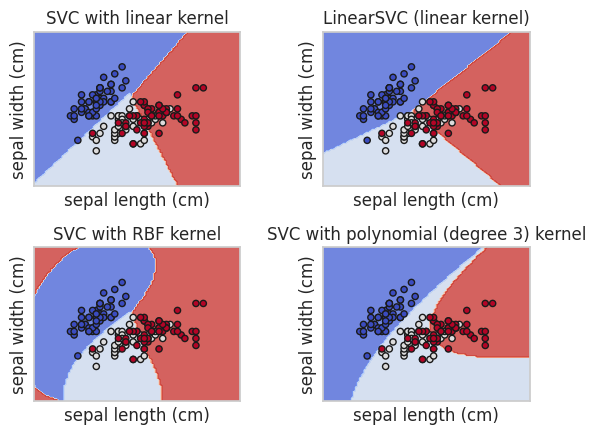

In [13]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter

models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 1.4 Градиентный спуск и стохастический градиентный спуск

### 1.4.1 Градиентный спуск

Градиентный спуск — это метод оптимизации, используемый для минимизации функции потерь. Он основан на вычислении градиента функции и движении в направлении наибольшего убывания:

$$
\theta := \theta - \alpha \nabla J(\theta)
$$

Где:
- $\alpha$ — скорость обучения (learning rate),
- $J(\theta)$ — функция потерь,
- $\nabla J(\theta)$ — градиент функции потерь.

Часто используются следующие функции потерь:

- **Среднеквадратичная ошибка (MSE)**: 
  $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2 $$
- **Логистическая функция потерь (Log Loss)**:
  $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log h_{\theta}(x_i) + (1 - y_i) \log (1 - h_{\theta}(x_i))] $$

### 1.4.2 Стохастический градиентный спуск (SGD)

Стохастический градиентный спуск (SGD) обновляет параметры модели после каждого примера:

$$
\theta := \theta - \alpha \nabla J(\theta, x_i, y_i)
$$

SGD быстрее обычного градиентного спуска на больших данных, но менее стабилен.

В `SGDClassifier` из `scikit-learn` есть несколько важных параметров:

- `loss`: функция потерь (`log_loss`, `hinge`, `modified_huber`, `squared_hinge`).
- `penalty`: регуляризация (`l1`, `l2`, `elasticnet`).
- `alpha`: коэффициент регуляризации.
- `learning_rate`: стратегия изменения скорости обучения (`constant`, `optimal`, `invscaling`, `adaptive`).
- `eta0`: начальное значение скорости обучения.
- `max_iter`: максимальное количество итераций обучения.
- `early_stopping`: прекращение обучения при отсутствии улучшений.
- `validation_fraction`: доля данных, выделяемая для проверки (при `early_stopping=True`).


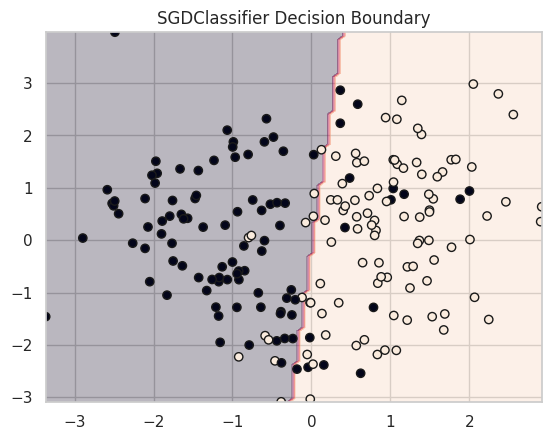

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

sgd = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.01, max_iter=1000)
sgd.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("SGDClassifier Decision Boundary")
plt.show()

## 1.5 Алгоритм k-ближайших соседей (KNN)

Алгоритм k-ближайших соседей — это простой и мощный метод классификации, который основывается на идее, что объекты, находящиеся рядом, вероятно принадлежат одному и тому же классу.

### 1.5.1 Основы алгоритма

Предположим, что у нас есть набор обучающих данных, состоящий из точек в пространстве признаков. Алгоритм KNN классифицирует новую точку, исследуя, какие классы наиболее часто встречаются среди её ближайших соседей. Расстояние между точками обычно измеряется с использованием метрики Евклида, но могут использоваться и другие метрики, такие как манхэттенское расстояние или расстояние Минковского.

#### Евклидово расстояние

Евклидово расстояние между двумя точками \( x = (x_1, x_2, ..., x_n) \) и \( y = (y_1, y_2, ..., y_n) \) в \( n \)-мерном пространстве вычисляется по формуле:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

### 1.5.2 Процесс классификации

1. Для новой точки находим расстояние до всех точек в обучающем наборе.
2. Выбираем \( k \) ближайших точек.
3. Классификация выполняется на основе большинства классов среди этих \( k \) ближайших точек.

### 1.5.3 Параметр \( k \)

Параметр \( k \) — это количество ближайших соседей, которых мы учитываем при классификации. Выбор значения \( k \) имеет большое значение:

- Малые значения \( k \) могут привести к переобучению (избыточной подгонке данных).
- Большие значения \( k \) могут привести к недообучению (неспособности уловить сложные зависимости в данных).

### 1.5.4 Пример классификации с использованием KNN

Для того чтобы обучить модель KNN в `scikit-learn`, можно использовать следующий код:


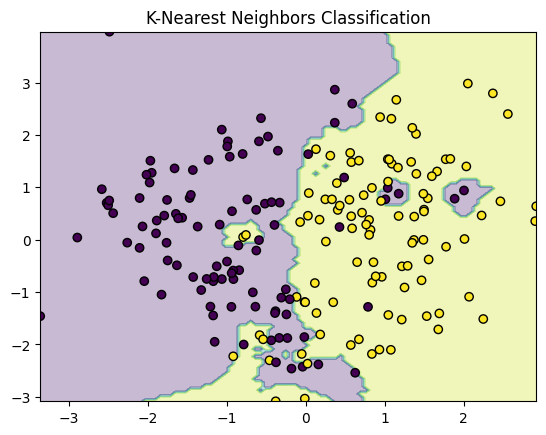

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Визуализация
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("K-Nearest Neighbors Classification")
plt.show()
